# Name: mohamad alrehaili
# ID: 421009808

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [5]:
#the dataset from kaggle 
#link : https://www.kaggle.com/mirichoi0218/insurance
df=pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
col_to_drop=['sex',  'smoker', 'region']
df.drop(col_to_drop,axis=1,inplace=True)
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [9]:
df=df[["age","charges","children"]]
df

,age,charges,children
0,19,16884.92400,0
1,18,1725.55230,1
2,28,4449.46200,3
3,33,21984.47061,0
4,32,3866.85520,0
...,...,...,...
1333,50,10600.54830,3
1334,18,2205.98080,0
1335,18,1629.83350,0
1336,21,2007.94500,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   charges   1338 non-null   float64
 2   children  1338 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 31.5 KB


<AxesSubplot:xlabel='age', ylabel='charges'>

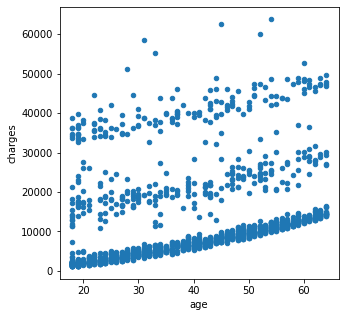

In [11]:
df.plot(kind="scatter",x="age",y="charges",figsize=(5,5))

### Q2

In [13]:
X = df.iloc[:, :-2].values
y = df.iloc[:, 1].values
X.shape

# Split dataset
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
# get the shape of training
X_test.shape

(536, 1)

Text(0, 0.5, 'Y')

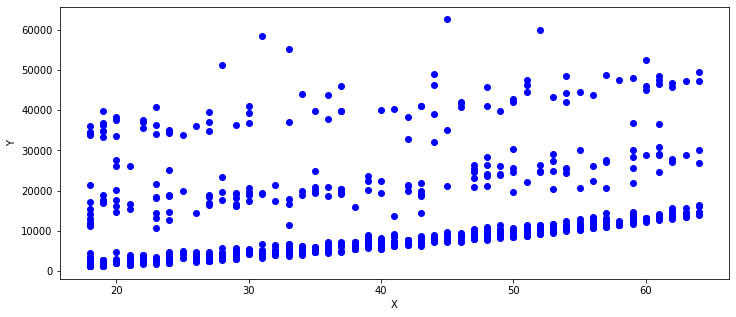

In [21]:
# Plot dataset

plt.rcParams['figure.figsize'] = [12, 5]
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X')
plt.ylabel('Y')


In [31]:
## y=theta0+theta1*x

def predict(theta0, theta1, x):
  
    return theta0+theta1*x


In [32]:
## applying gradient decent 

def fit(X,Y, lr, epochs=10):
    theta0=0
    theta1=0
    errors=[]
    for epoch in range(epochs):
        d_theta0=0
        d_theta1=0
        err=0.
        for x, y in zip(X,Y): 
     
            y_pred= predict(theta0, theta1, x)
            err=err+np.abs(y-y_pred)
            d_theta0=d_theta0+(y_pred-y)*1
            d_theta1=d_theta1 +(y_pred-y)*x
        ## once you cacluclate the gradient for all exmaples in the training set
        ## update the theta0 and theta 1
        
        theta0=theta0 - lr*((1/X.shape[0])*d_theta0)
        theta1=theta1 - lr*((1/X.shape[0])*d_theta1)
        errors.append(err)
        
    print(theta0,theta1)
    print(len(errors))
    plt.plot(list(range(epochs)),errors)
    plt.show()
    return theta0, theta1


[-2.04486495e+32] [-9.078888e+33]
10


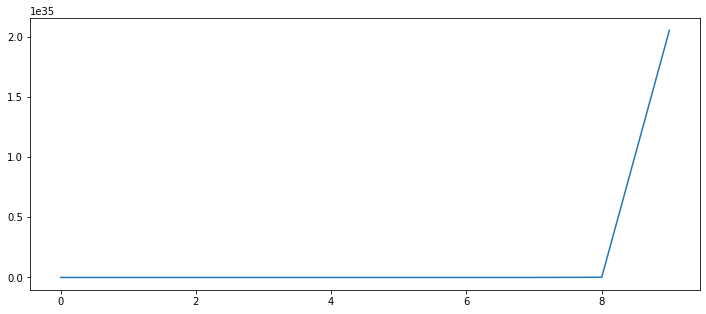

In [33]:
theta_0, theta_1=fit(X_train, y_train, lr=0.8)

In [34]:
y_pred=predict(theta_0,theta_1,X_test)

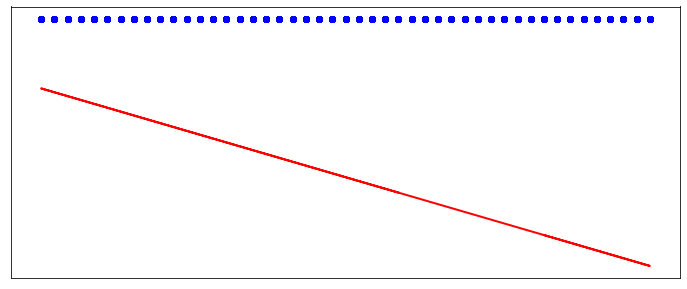

In [35]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


[0.] [0.]
10


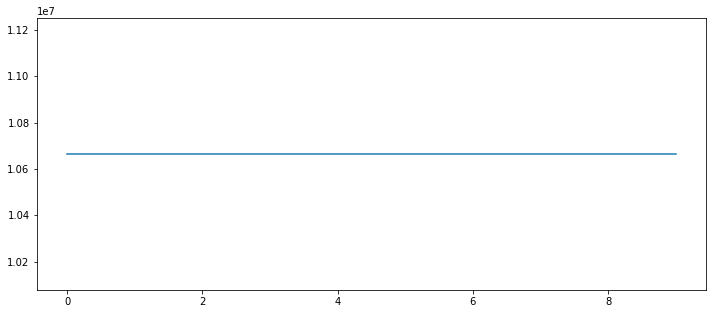

[-1.90856364e+26] [-8.47373103e+27]
10


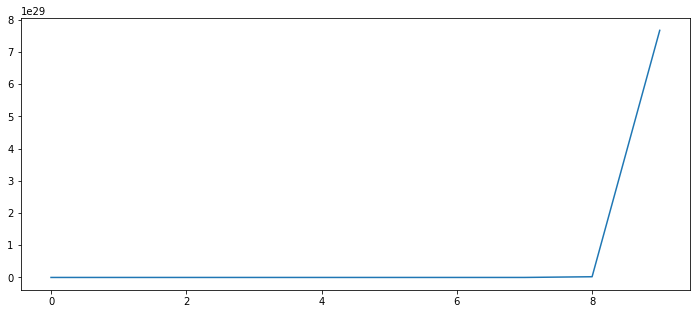

[-1.98265686e+29] [-8.8026936e+30]
10


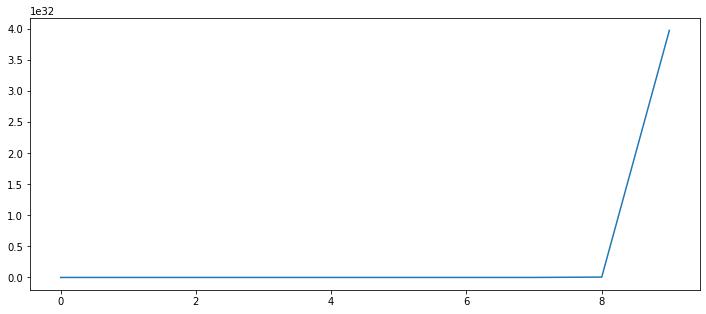

[-1.14878425e+31] [-5.1004266e+32]
10


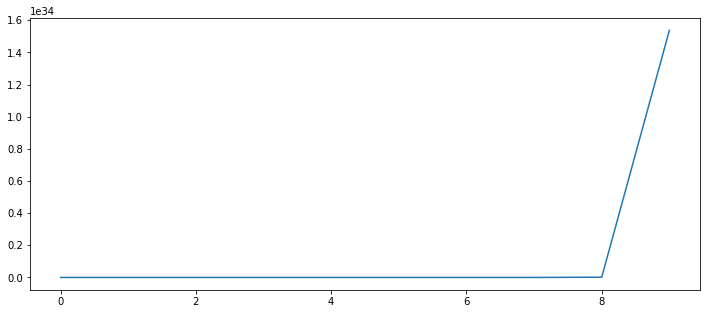

[-2.04486495e+32] [-9.078888e+33]
10


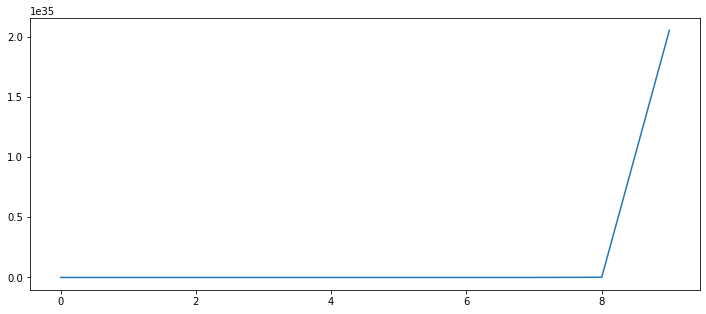

In [36]:
out_vectore=[]
out_vector=[0 for i in range(5)]
input_vector=[]
input_vector=[0 for i in range(5)]
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
j=0
for i in range(5):
    theta_0, theta_1=fit(X_train, y_train, lr=i/5)
    y_pred=predict(theta_0,theta_1,X_test)
    r = rmse(y_test, y_pred)
    out_vector[j]=r
    input_vectorj=(i/5)
    j=j+1

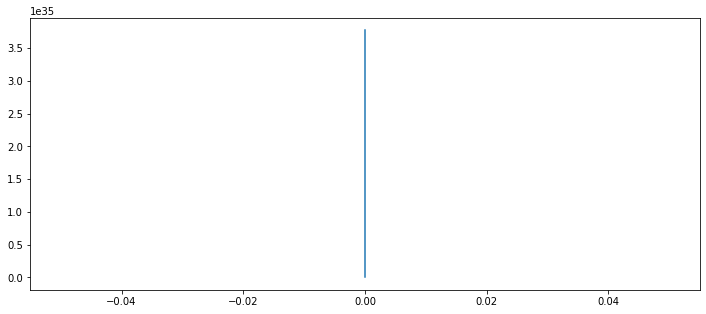

In [37]:
plt.plot(input_vector, out_vector)

### Q3

In [38]:
df2=df
df2.head()

,age,charges,children
0,19,16884.92400,0
1,18,1725.55230,1
2,28,4449.46200,3
3,33,21984.47061,0
4,32,3866.85520,0


In [39]:
X = df.iloc[:, :-2].values
y = df.iloc[:, 1].values
X.shape

# Split dataset
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
# get the shape of training
X_test.shape

(402, 1)

In [40]:
## linear regression
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
history=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 312275392.0000
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 286824704.0000
Epoch 3/10
30/30 [==============================] - 0s 873us/step - loss: 264361856.0000
Epoch 4/10
30/30 [==============================] - 0s 833us/step - loss: 245064992.0000
Epoch 5/10
30/30 [==============================] - 0s 873us/step - loss: 227696944.0000
Epoch 6/10
30/30 [==============================] - 0s 804us/step - loss: 212596560.0000
Epoch 7/10
30/30 [==============================] - 0s 832us/step - loss: 199456384.0000
Epoch 8/10
30/30 [==============================] - 0s 836us/step - loss: 188027616.0000
Epoch 9/10
30/30 [==============================] - 0s 944us/step - loss: 178529888.0000
Epoch 10/10
30/30 [==============================] - 0s 714us/step - loss: 170556928.0000


In [42]:
Y_predict = model.predict(X_test)

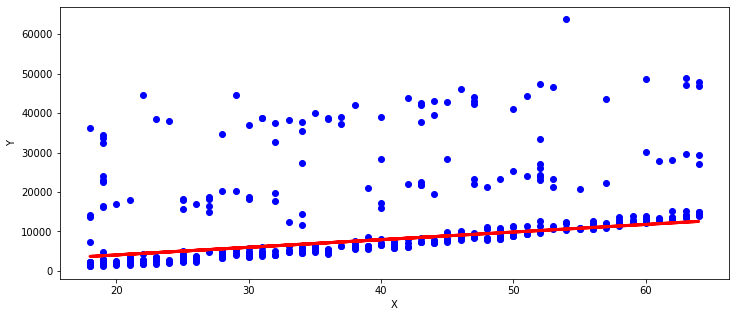

In [45]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_test, Y_predict, color='red', linewidth=3)
plt.show()

In [46]:
#Polynomial
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train, y_train) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly,y_train)

LinearRegression()

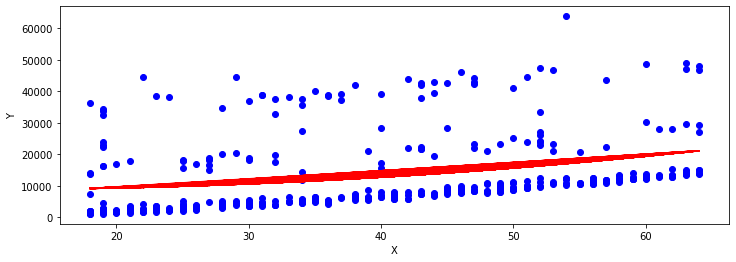

In [48]:
plt.plot(X_test, lin2.predict(poly.fit_transform(X_test)), color = 'red') 
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [49]:
#  Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_test)

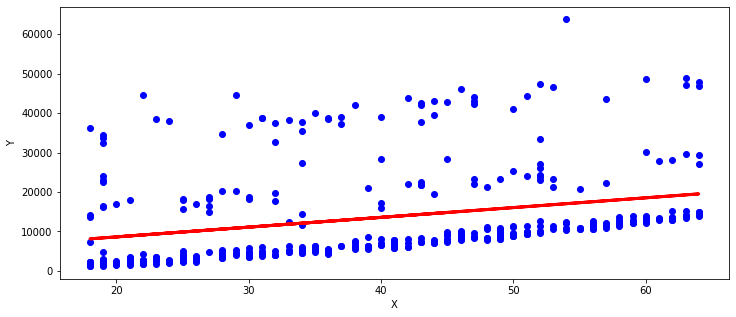

In [50]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_test, pred_train_rr, color='red', linewidth=3)
plt.show()

In [52]:
#Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_test)

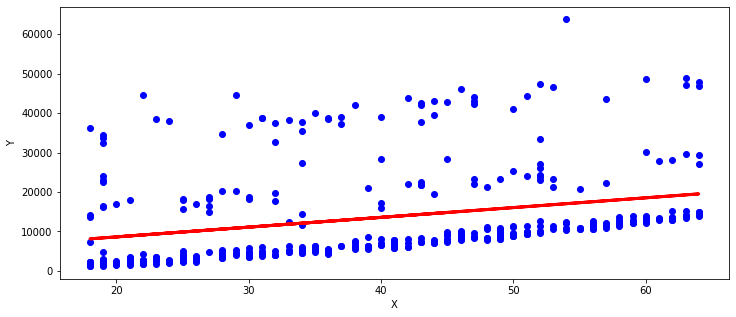

In [53]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_test, pred_train_lasso, color='red', linewidth=3)
plt.show()

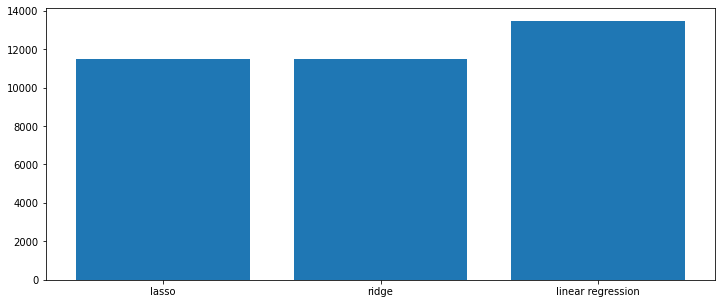

In [56]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

para1=rmse(y_test, pred_train_lasso)
para2=rmse(y_test, pred_train_rr)
para3=rmse(y_test, Y_predict)
para=[para1, para2, para3]
in_models=['lasso', 'ridge', 'linear regression' ]
plt.bar(in_models,para)
plt.show()

### better to choose lasso and ridge because the have a small result 

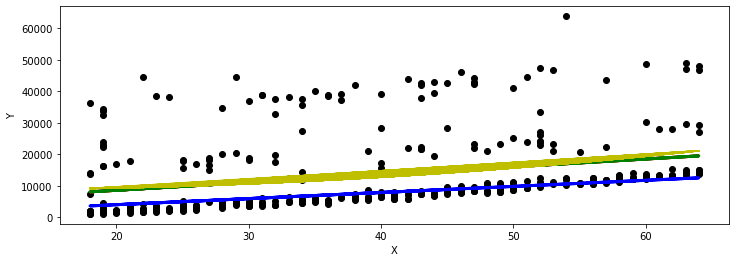

In [57]:
#compare models 
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(X_test, y_test, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_test, pred_train_lasso, color='r', linewidth=3)
plt.plot(X_test, pred_train_rr, color='g', linewidth=3)
plt.plot(X_test, lin2.predict(poly.fit_transform(X_test)), color = 'y') 
plt.plot(X_test, Y_predict, color='b', linewidth=3)
plt.show()

### Q4

In [58]:
df3=df
df3.head()

,age,charges,children
0,19,16884.92400,0
1,18,1725.55230,1
2,28,4449.46200,3
3,33,21984.47061,0
4,32,3866.85520,0


In [59]:
X = df.iloc[:, :-2].values
y = df.iloc[:, 1].values
X.shape

# Split dataset
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
# get the shape of training
X_test.shape

(536, 1)

Text(0, 0.5, 'charges')

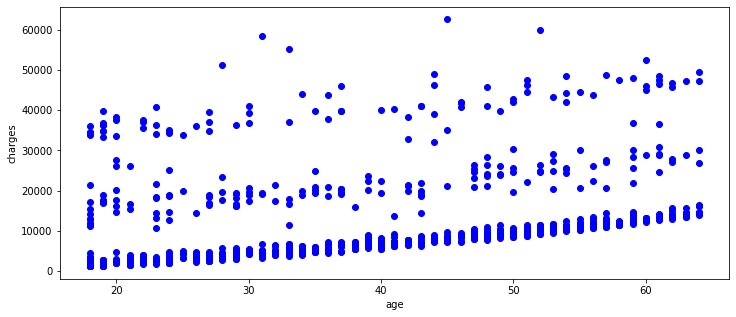

In [61]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('age')
plt.ylabel('charges')



In [65]:
def get_best_param(X, y):  
    X_transpose = X.T  
    best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
      
    return best_params # returns a list  

In [67]:
X_b = np.c_[np.ones((802, 1)), X_train] # set bias term to 1 for each sample  
params = get_best_param(X_b,y_train)  
print(params)  

[3533.71202888  248.79332501]


In [71]:
test_X_b = np.c_[np.ones((536, 1)), X_test]  
prediction = test_X_b.dot(params)  
  
 

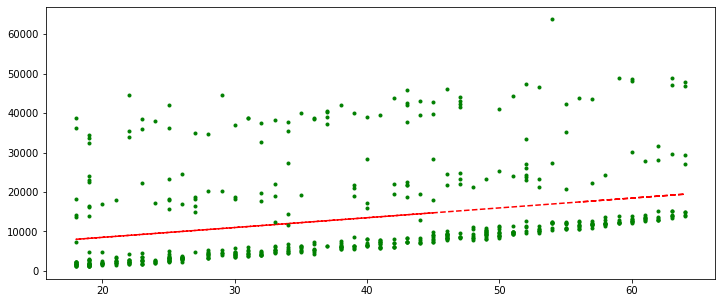

In [73]:
plt.plot(X_test, prediction, "r--")  
plt.plot(X_test, y_test, "g.")  
plt.show() 

In [ ]:
## your code must be implmented based on matrices and vectors.
class linear_regression:
    # X is the X_dataset
    # Y is the Y_dataset
    # n is the number of paramaters (theta)
    def __init__(self, X,Y, n):
        self.X=X
        self.Y=Y
        self.X_train=None
        self.Y_train
        self.X_train=None
        self.X_test=None
        self.y_train=None
        self.y_test=None
        
        # create a vector of theta with length n+1 (theta_0, theta_1, ......, theta_n)
        self.theta=np.zeros(n+1)
        ## write your code there
    
        X = df.iloc[:, :-2].values
        y = df.iloc[:, 1].values
        X.shape

        # Split dataset
        X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
        # get the shape of training
        X_test.shape
    # Add column of ones to X to represent x0
    def concatenate_X0_with_X(self):
        df.insert(0, 'Ones', 1)
        pass
    
    def split_dataset(self, test_percentage=0.3):
        ## used the train_test_split in sklearn
        X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
        pass
        

    # y_hat=theta' X
    def predict(self,theta0, theta1, X):
        return np.dot(self.theta.T,X)
    
    def fit(self, lr, epochs):
        theta0=0
    theta1=0
    errors=[]
    for epoch in range(epochs):
        d_theta0=0
        d_theta1=0
        err=0.
        for x, y in zip(X,Y): 
     
            y_pred= predict(theta0, theta1, x)
            err=err+np.abs(y-y_pred)
            d_theta0=d_theta0+(y_pred-y)*1
            d_theta1=d_theta1 +(y_pred-y)*x
        ## once you cacluclate the gradient for all exmaples in the training set
        ## update the theta0 and theta 1
        
        theta0=theta0 - lr*((1/X.shape[0])*d_theta0)
        theta1=theta1 - lr*((1/X.shape[0])*d_theta1)
        errors.append(err)
        
    print(theta0,theta1)
    print(len(errors))
    plt.plot(list(range(epochs)),errors)
    plt.show()
    return theta0, theta1

    pass
    
    
    ######## You can add any functions
    